# Neural network with a ResNet structure

The main objective for this code is to create neural network that uses ResNet layesr to build dense neural netowrk using functional interface.
The ResNet architesture layer schematic:

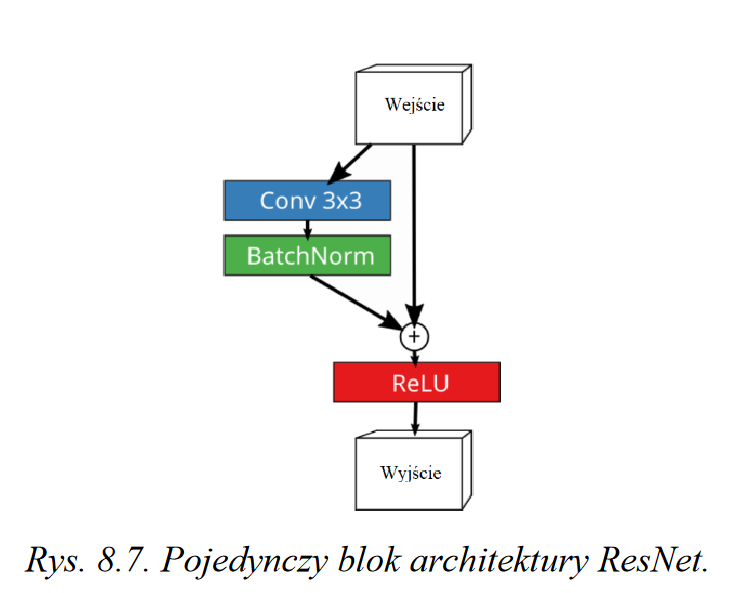

Then the tensors inside naural network model are trained and tested for accuracy and loss metrics

In [ ]:
from keras.datasets import mnist  # Importing necessary libraries
import numpy as np
import pandas as pd

# Loading the MNIST dataset
data = mnist.load_data()
X_train, y_train = data[0][0], data[0][1]  # Training data and labels
X_test, y_test = data[1][0], data[1][1]  # Testing data and labels

# Expanding dimensions to match the CNN expected input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Converting labels to categorical values for training and testing
y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Adding a ResNet block
from keras.layers import Conv2D, BatchNormalization, Add, Activation

def block_ResNet(tensor):
    filter_cnt = 32
    skip_tensor = tensor  # Copy tensor that will be skipped
    output_tensor = Conv2D(filter_cnt, (3, 3), padding='same')(tensor)  # Convolutional layer
    output_tensor = BatchNormalization(axis=3)(output_tensor)  # Batch normalization
    output_tensor = Add()([output_tensor, skip_tensor])  # Residual connection with skip connection
    output_tensor = Activation('relu')(output_tensor)  # ReLU activation
    return output_tensor

In [ ]:
# Creating a simple network with a specified number of ResNet blocks
from keras.backend import softmax
from keras.layers import Flatten, Dense, Input
from keras.models import Model

# Creating a network containing the given number of ResNet blocks
num_layers = 3
output_tensor = input_tensor = Input(X_train.shape[1:])  # Input tensor initialization
for i in range(num_layers):
    output_tensor = block_ResNet(output_tensor)  # Creating ResNet blocks iteratively

output_tensor = Flatten()(output_tensor)  # Flattening the output tensor
output_tensor = Dense(10, activation='softmax')(output_tensor)  # Dense layer with softmax activation
model2 = Model(inputs=input_tensor, outputs=output_tensor)  # Creating the model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')  # Compiling the model

In [ ]:
# training and testing model
model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 287s 152ms/step - loss: 134.7184 - accuracy: 0.8565 - val_loss: 134.9284 - val_accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 285s 152ms/step - loss: 146.6533 - accuracy: 0.8800 - val_loss: 190.7684 - val_accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 273s 146ms/step - loss: 156.1187 - accuracy: 0.8824 - val_loss: 167.7022 - val_accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 285s 152ms/step - loss: 151.5244 - accuracy: 0.8860 - val_loss: 160.3489 - val_accuracy: 0.8957
Epoch 5/10
1875/1875 [==============================] - 276s 147ms/step - loss: 152.8969 - accuracy: 0.8885 - val_loss: 164.2225 - val_accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 272s 145ms/step - loss: 149.6281 - accuracy: 0.8904 - val_loss: 175.4607 - val_accuracy: 0.8914
Epoch 7/10
1875/1875 [==============================] - 284s 151ms/step - loss: 154.8530

In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=73a8d88ca61cb789e52efba3fb2edbde528dc300b49d7238734d5d20f5e56a53
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


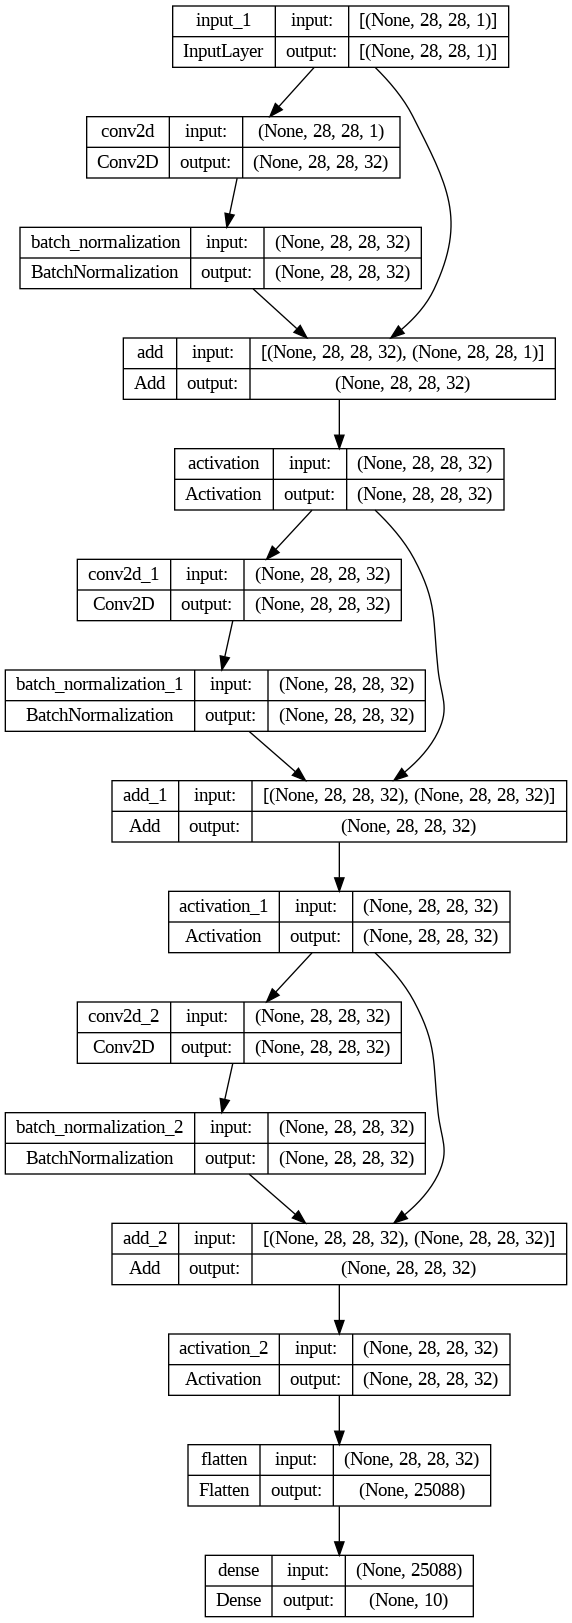

In [ ]:
# Network structure visualization
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes=True)

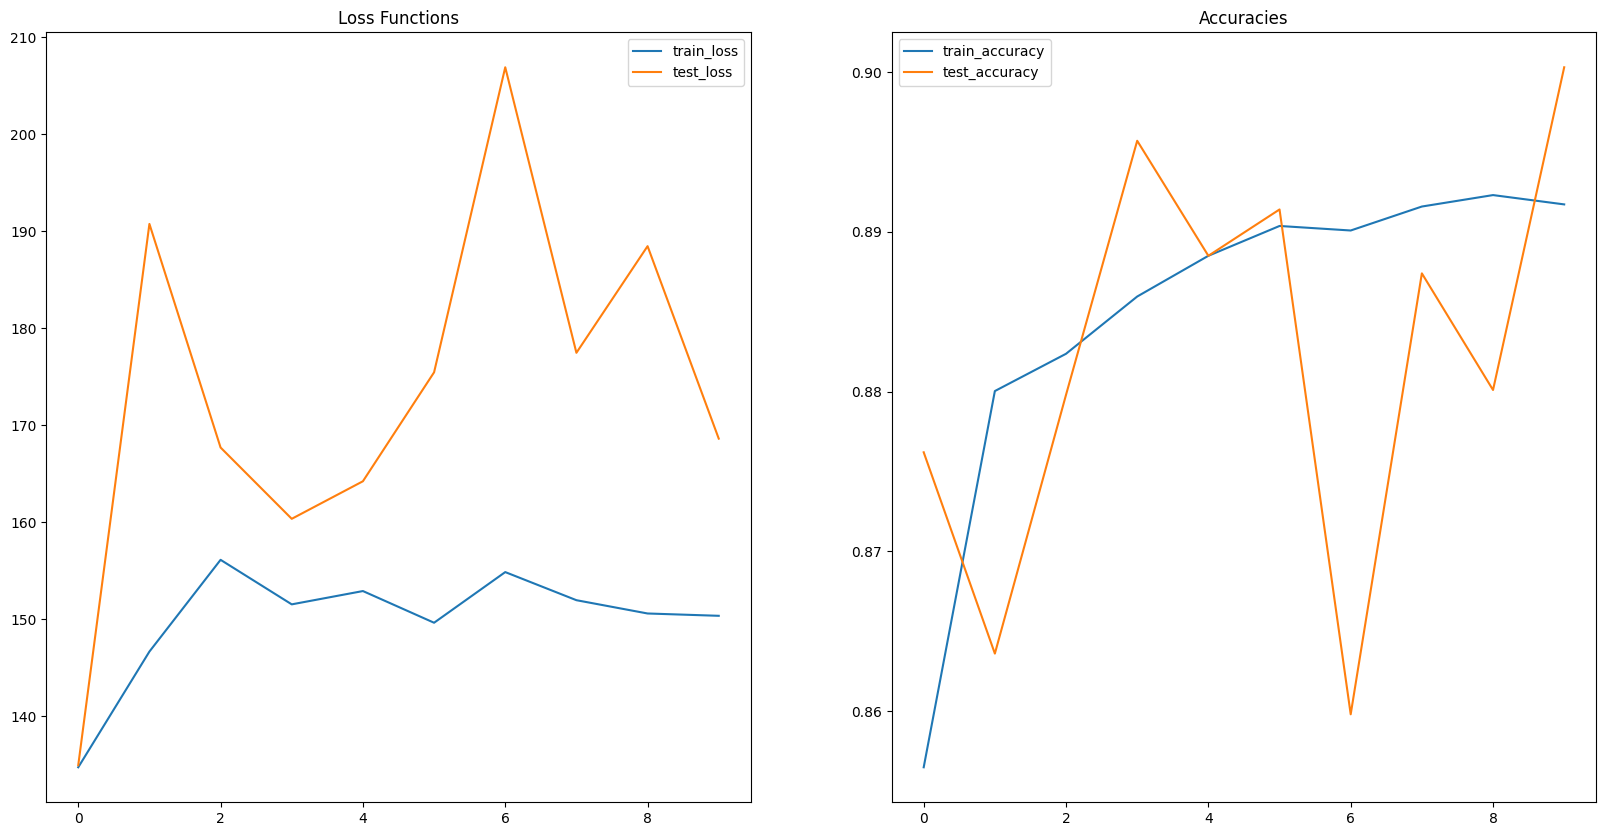

In [ ]:
# Plotting loss and accuracy curves
# Function to plot the learning curve for a given model
def generateNetworkLearningCurve(model, epochs=10):
    from matplotlib import pyplot as plt
    history = model.history.history
    train_loss = history['loss']
    test_loss = history['val_loss']
    train_accuracy = history['accuracy']
    test_accuracy = history['val_accuracy']
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    epochs = np.arange(0, epochs)
    ax[0].plot(epochs, train_loss, label='train_loss')
    ax[0].plot(epochs, test_loss, label='test_loss')
    ax[0].set_title('Loss Functions')
    ax[0].legend()
    ax[1].set_title('Accuracies')
    ax[1].plot(epochs, train_accuracy, label='train_accuracy')
    ax[1].plot(epochs, test_accuracy, label='test_accuracy')
    ax[1].legend()

generateNetworkLearningCurve(model2, 10)  # Generating learning curve for model2 with 10 epochs